Global Youtube Statistics

Importing python libraries and the csv file

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import plotly.express as px

In [2]:
df = pd.read_csv('global_youtube_statistics.csv', encoding='unicode_escape')

Cleaning the Dataset

In [3]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df.shape

(995, 28)

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
mean_value = df['subscribers_for_last_30_days'].mean()

In [8]:
df['subscribers_for_last_30_days'].fillna(value=mean_value, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     808 non-null    int64  
 1   Youtuber                                 808 non-null    object 
 2   subscribers                              808 non-null    int64  
 3   video views                              808 non-null    float64
 4   category                                 808 non-null    object 
 5   Title                                    808 non-null    object 
 6   uploads                                  808 non-null    int64  
 7   Country                                  808 non-null    object 
 8   Abbreviation                             808 non-null    object 
 9   channel_type                             808 non-null    object 
 10  video_views_rank                         808 non-n

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
989    False
990    False
991    False
993    False
994    False
Length: 808, dtype: bool

Exploratory Data Analysis Visualization

In [12]:
df['subscribers'].value_counts()

12500000    16
15000000    15
12400000    14
13300000    13
15100000    13
            ..
33600000     1
33300000     1
32800000     1
32600000     1
25900000     1
Name: subscribers, Length: 263, dtype: int64

In [28]:
xm = df['category'].unique() 
xm


array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

We can see that Shows and Trailers category have the highest subscribers.

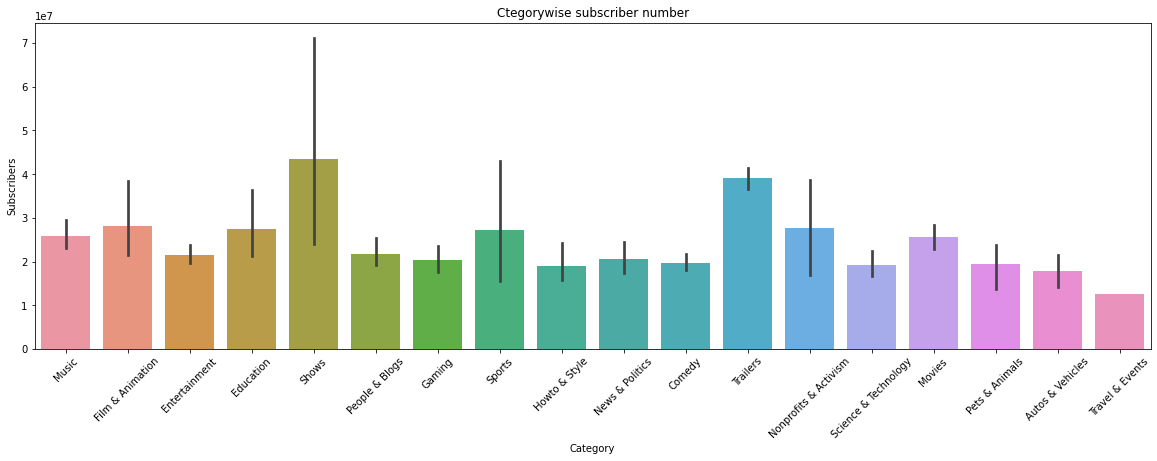

In [22]:
#Bar chart of categorywise subscribers
plt.figure(figsize=(20,6))
sns.barplot( x = 'category', y = 'subscribers', data= df)
plt.title('Ctegorywise subscriber number')
plt.xlabel("Category")
plt.ylabel("Subscribers")
plt.xticks(rotation=45)
plt.show()

T-Series, which is a channel from India, from 'Music' category has the highest number of subscribers.Then we have YoutubeMovies and MrBeast in terms of subscribers.Most of the channels in top 10, in terms of views are from Entertainment category, and five of them are from india, in the later portion of this notebook we will see factors affecting the views or subscribers for an youtube channel

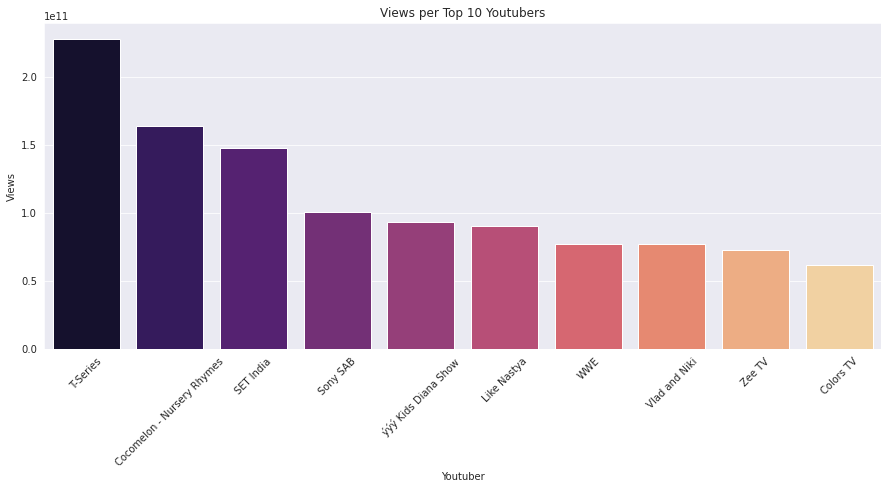

In [62]:
#Views of Top 10 Youtubers
plt.figure(figsize=(15,6))
sns.barplot(y='video views', x='Youtuber', data=df,order = df.sort_values('video views',ascending=False)['Youtuber'].head(10),palette='magma')
plt.title('Views per Top 10 Youtubers')
plt.xlabel('Youtuber')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

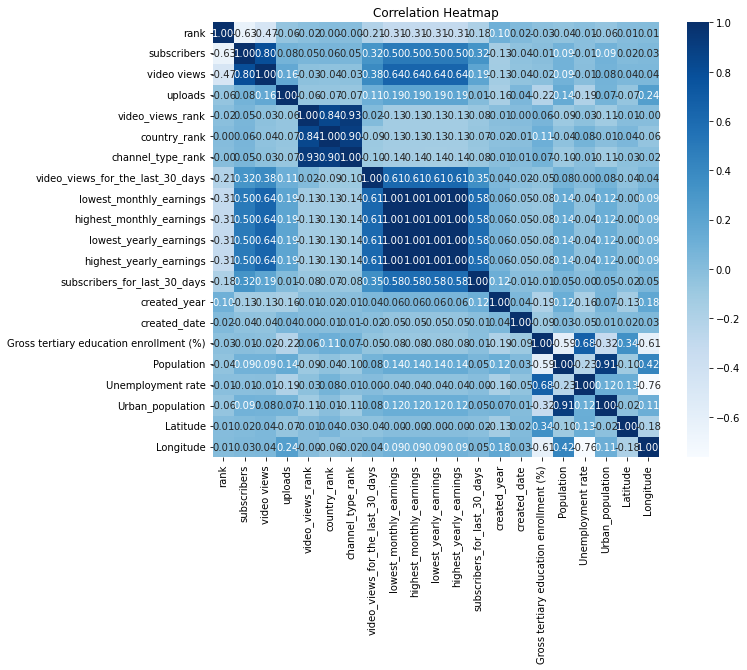

In [15]:
data_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, annot=True, fmt= '.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Most of the youtube channel, more than 300 are from United States, followed by India from where we have about 160 youtube channels and countries like Iraq, Italy, chinam Bangladesh etc. have very few youtubers.

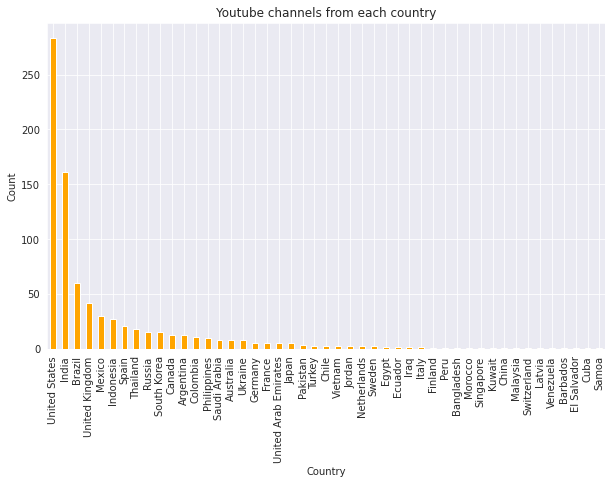

In [67]:
plt.figure(figsize=(10, 6))
df['Country'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Youtube channels from each country')
plt.xticks(rotation=90)
plt.show()

As the number of subscriber increases the number of view increases.

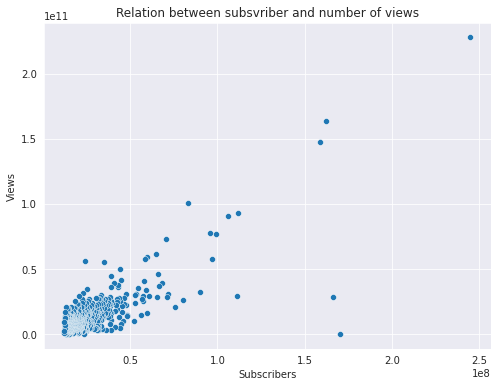

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = 'subscribers' , y = 'video views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.title('Relation between subsvriber and number of views')
plt.show()

Most of the channels, we have are from Entertainment and Music category,and we have very less youtube channels for Sports, Autos & Vehicles.

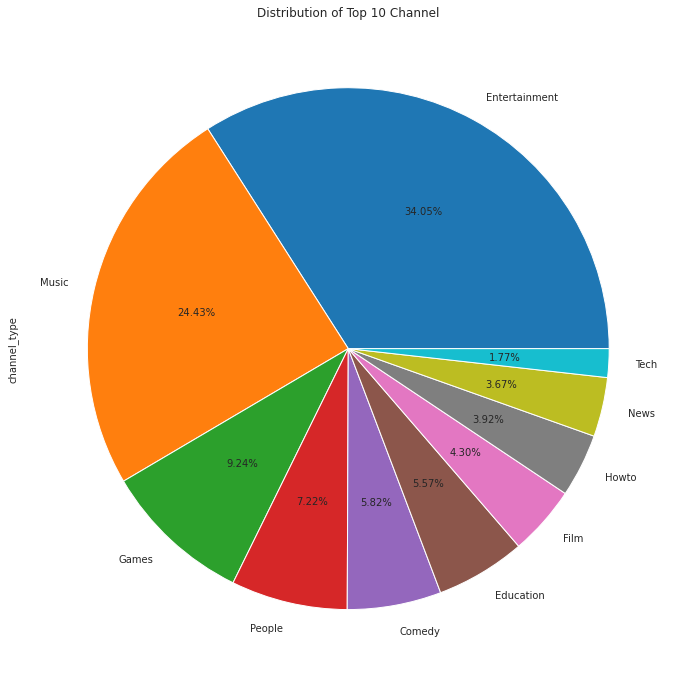

In [86]:
youtubers_distribution_by_top_10_channel= df['channel_type'].value_counts().head(10)
plt.figure(figsize=(12,12))
youtubers_distribution_by_top_10_channel.plot(kind='pie', autopct='%.2f%%')
plt.title('Distribution of Top 10 Channel')


plt.show()